# Etivity 2 Data preparation & Can we learn?
## Name: Martin Power
## ID      : 9939245


#### NOTE : Feedback last week was that code was difficult to follow. To improve this I have added a Table of Contents to the notebook with clickable links to navigate between the sections. Clicking on any of the links below will take you directly to the corresponding section in the notebook. Hopefully this will make navigating the various tasks in the notebook easier.

# Table of Contents

#### Task 1
* [Task 1 Code](#task1)
* [Task 1 -  Fill In Missing "Age" Values](#task1_age)
     - [Task 1 - Age Decision Tree Preparation](#task1_tree_prep)
     - [Task 1 - Age Decision Tree Application](#task1_tree_app)  
     - [Task 1 - Age Decision Tree Analysis](#task1_tree_analysis)  
* [Task 1 -  Fill In Missing "Job" Values](#task1_job)
* [Task 1 -  Fill In Missing "Education" Values](#task1_edu)
* [Task 1 -  Fill In Missing "Contact" Values](#task1_con)
* [Task 1 -  Fill In Missing "Poutcome" Values](#task1_poutcome)
* [Task 1 -  Analysis](#task1_analysis)

#### Task 2
* [Task 2 Code](#task2)
* [Task 2 -  Numerical Attribute Plots](#task2_plot)
* [Task 2 -  Numerical Attribute Plots Analysis](#task2_plot_analysis)
* [Task 2 -  "Age" Box-Cox Transformation](#task2_age_boxcox)
* [Task 2 -  "Balance" Yeo-Johnson Transformation](#task2_bal_yj)
* [Task 2 -  Analysis](#task2_analysis)

#### Task 3
* [Task 3 Code](#task3)
* [Task 3 - "Work Status" Feature](#task3_work_status)
* [Task 3 - "Has Been Married" Feature](#task3_has_been_married)
* [Task 3 - "Post Primary" Feature](#task3_post_primary)
* [Task 3 -  Analysis](#task3_analysis)

#### Task 4
* [Task 4 Code](#task4)
* [Task 4 -  Replace Categoricals With Numerical Attributes](#task4_replace_cat)
* [Task 4 -  Prepare Dataset](#task4_prep_dataset)
* [Task 4 - Logistic Regression Classification](#task4_logreg)
* [Task 4 - Probability Plots](#task4_prob)
* [Task 4 -  Analysis](#task4_analysis)


#### Task 5
* [Task 5 Code](#task5)
* [Task 5 - Logisic Regression Learning Curve](#task5_logistic)
* [Task 5 - Low Complexity Learning Curve : Linear Regression](#task5_linear)
* [Task 5 - High Complexity Learning Curve : AdaBoost](#task5_adaboost)
* [Task 5 - Analysis](#task5_analysis)

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import power_transform
from scipy.stats import boxcox

%matplotlib inline

<a id='task1'></a>

# Task 1 (CS5062)

Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [117]:
# First of all, load the dataset and display some initial information from the dataset

df = pd.read_csv('./bank_et2.csv')

print("Numer of Samples  in Dataset:\t",df.shape[0])
print("Numer of Features in Dataset:\t",df.shape[1])

# Drop column 0
df = df.drop(df.columns[0], axis=1)

Numer of Samples  in Dataset:	 2000
Numer of Features in Dataset:	 20


In [118]:
# Examine the first few data rows
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [119]:
# Examine the last few data rows.
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [120]:
# Print statistical summary for all attributes
df.describe(include='all')

# "include='all'" added after reviewing Brian Parle's code

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1988.000000,1990,2000,1896,2000,2000.000000,2000.000000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,11,3,3,2,NaN,NaN,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,NaN,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,yes
freq,NaN,461,1111,995,1985,NaN,NaN,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,41.753018,NaN,NaN,NaN,NaN,1413.663500,0.241951,0.485030,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,12.724358,NaN,NaN,NaN,NaN,3131.224213,0.821604,1.075543,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-980.000000,-2.632068,-2.851405,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,201.500000,-0.308018,-0.274181,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,551.000000,0.224099,0.487082,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,1644.500000,0.806315,1.211896,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


In [121]:
# From https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
# The following code extracts the columns with categorical attributes

cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible

for var in cat_var:
    print("\n****\t",var,"\t****")
    print("Total Values = \t",df[var].count(),"\n")
    print(df[var].value_counts(dropna=False))
    print("****************************")
    
# "dropna=False" added to value_counts at Garret Molloy's suggestion. Useful to display NaNs


****	 job 	****
Total Values = 	 1990 

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
NaN               10
Name: job, dtype: int64
****************************

****	 marital 	****
Total Values = 	 2000 

married     1111
single       674
divorced     215
Name: marital, dtype: int64
****************************

****	 education 	****
Total Values = 	 1896 

secondary    995
tertiary     684
primary      217
NaN          104
Name: education, dtype: int64
****************************

****	 default 	****
Total Values = 	 2000 

no     1985
yes      15
Name: default, dtype: int64
****************************

****	 housing 	****
Total Values = 	 2000 

no     1037
yes     963
Name: housing, dtype: int64
****************************

****	 loan 	****
Total Values = 	 2000 

no     1750
yes     250
Name: loa

In [122]:
# Print number of missing values for each attribute
df.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [123]:
# Get list of numeric columns.
# This will be used later in outlier detection
# If this is not stored now it will later include categorical values that have been converted to numerical for the
# decision tree for age imputation

# From https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

<a id='task1_age'></a>

#### Task1 -  Fill In Missing "Age" Values

To fill in the missing age value I am going to use a decision tree. The following sections desribe that process
  - Analysis of the rows with missing age values
  - Decision Tree Preparation
  - Decision Tree Application
  - Decision Tree Analysis
  
The overall process will involve the creation of 3 new features and the use of those 3 new features to train a decison tree to impute the missing age values

In [124]:
#  Print the 12 rows with that has NaN for "age" attribute
# https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=df.columns[df.isnull().any()]
print(df[df["age"].isnull()])

      age            job  marital  education default  balance  ratio_bal_ln  \
456   NaN  self-employed  married   tertiary      no      917      0.311161   
472   NaN    blue-collar  married    primary      no      474      0.729179   
526   NaN       services  married  secondary      no     2478      0.469463   
595   NaN     management  married   tertiary      no     1857     -0.137751   
597   NaN  self-employed  married  secondary     yes      254      0.800582   
601   NaN         admin.   single  secondary      no      111      0.269082   
605   NaN     management  married   tertiary      no     1330      1.007376   
744   NaN     management  married   tertiary      no      -61      0.638129   
795   NaN     technician   single   tertiary      no      992      0.901646   
1171  NaN        retired  married   tertiary      no     2812     -0.336489   
1232  NaN        student   single  secondary      no      431     -1.980588   
1408  NaN  self-employed   single   tertiary      no

<a id='task1_tree_prep'></a>

#### Task 1 - Age Decision Tree Preparation

Even though there are only 12 missing "age" values within the 2000 examples, as a learning exercise I would like to use
a Decision Tree to impute missing values for "age".

My intuition is that "job", "martial" and "education" can all provide information that can be used to help determine a
realistic age.

For example, people who are "retired" are likely to be older and people who are "single" may tend to be younger

Box plot analysis of "job" showed that there were 3 distinct clusters in terms of "age" : "retired", "single" and all 
other jobs. To capture this I created a new feature called "work_status" that has 3 values : "student", "retired" and
"available"

Box plot analysis of "martial" showed that "married" and "divorced" had similar age distribution and were distinct to
"single". As a result I created a new feature called "has_been_married" that combined "married" and "divorced" for the
purpose of imputing "age"

Box plot analysis of "education" showed "primary" had a higher median age than "secondary" and "tertiary".
It also showed that "secondary" and "tertiary" had similar medians. I created a new feature called "post_primary"
to capture this. It combines "secondary" and "tertiary" as everyone in those categories has at least secondary education


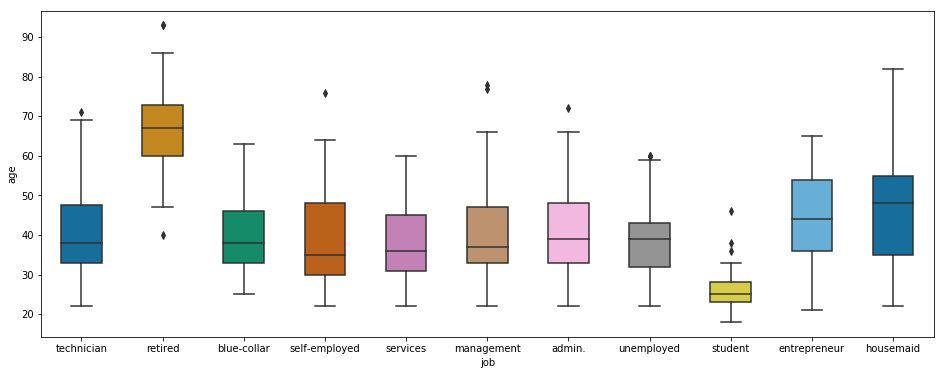

In [125]:
# Plot Age versus Job
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='job', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Retired has higher median age
# Student has lower median age
# All other categories have boradly similar medians

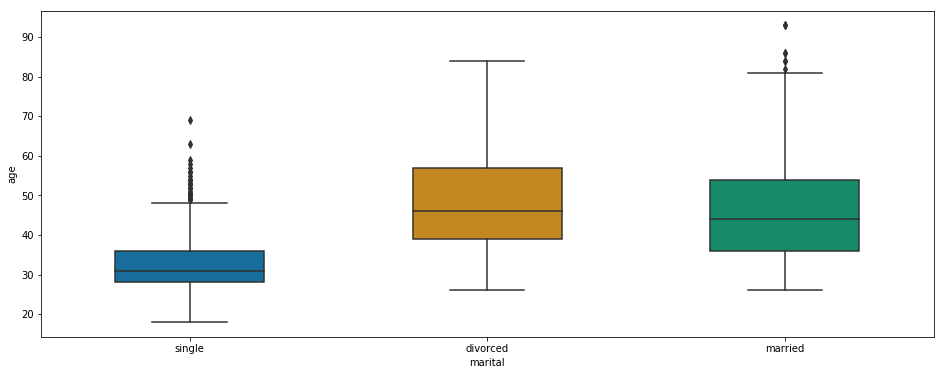

In [126]:
# Plot Age versus Marital
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='marital', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Single has lower median
# Divorced and Married have similar age distributions

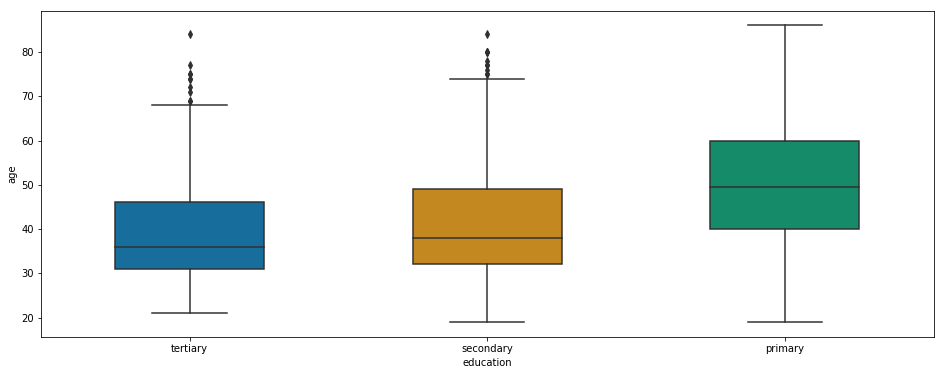

In [127]:
# Plot Age versus Education
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='education', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Primary has higher median
# Tertiary and Secondary have similar distributions

<a id='task3_work_status_code'></a>

#### "Work Status" Feature Creation - Used in Task 1 but also applies to Task 3

Box plot analysis of "job" showed that there were 3 distinct clusters in terms of "age" : "retired", "single" and all 
other jobs. To capture this I created a new feature called "work_status" that has 3 values : "student", "retired" and
"available"

[click this link](#task3) to jump back to the Task 3 section of the Notebook.

In [128]:
df['work_status'] = df['job']

In [129]:
# Set Work Status values to either 'available', 'student' or 'retired'
# 'available' = Available for employment. Either currently employed or unemployed.
#               Not retired and not studying
di = {'management'    : 'available',       
      'technician'   : 'available',      
      'blue-collar'   : 'available',      
      'admin.'        : 'available',           
      'services'      : 'available',          
      'unemployed'    : 'available',        
      'self-employed' : 'available',     
      'entrepreneur'  : 'available',      
      'housemaid'     : 'available'}   
df['work_status'].replace(di, inplace=True)
df['work_status'].head(10)

0    available
1    available
2      retired
3    available
4      retired
5    available
6    available
7    available
8    available
9    available
Name: work_status, dtype: object

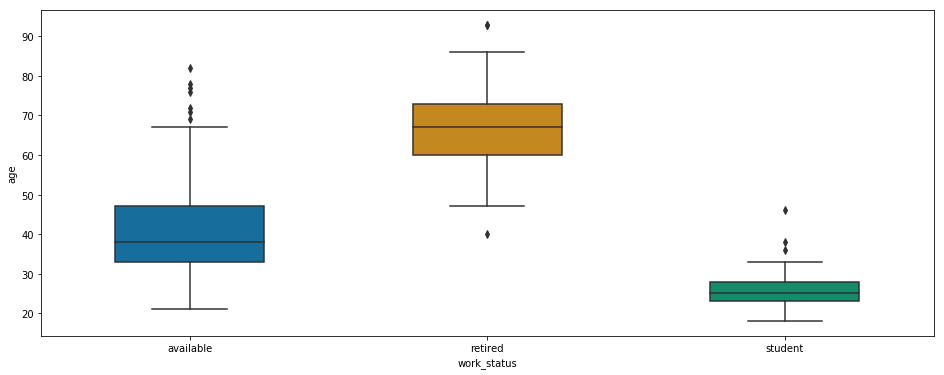

In [130]:
# Compare Work Status versus Age
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='work_status', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Feature shows 3 distinct clusters of age with different medians

<a id='task3_has_been_married_code'></a>

#### "Has Been Married" Feature Creation - Used in Task 1 but also applies to Task 3

Box plot analysis of "martial" showed that "married" and "divorced" had similar age distribution and were distinct to
"single". As a result I created a new feature called "has_been_married" that combined "married" and "divorced" for the
purpose of imputing "age"

[click this link](#task3) to jump back to the Task 3 section of the Notebook.

In [131]:
# Create an attribute that says if someone has even been married
df['has_been_married'] = df['marital']
df['has_been_married'].head(10)
di = {'divorced'    : 'yes',       
      'married'     : 'yes',      
      'single'      : 'no'}   
df['has_been_married'].replace(di, inplace=True)
df['has_been_married'].head(10)

0     no
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8    yes
9    yes
Name: has_been_married, dtype: object

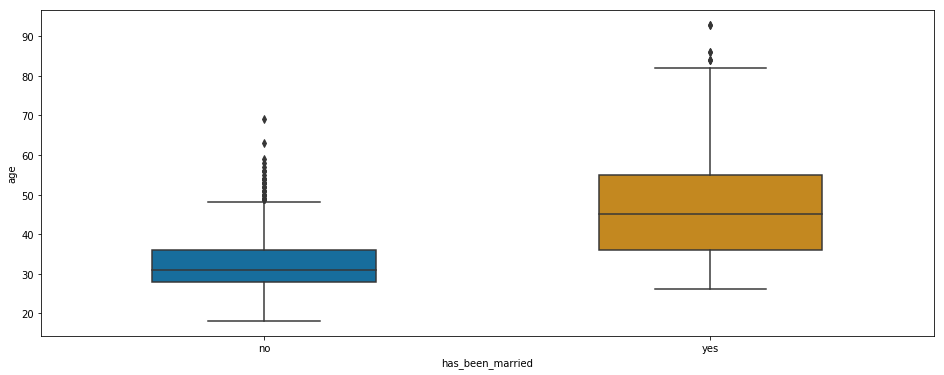

In [132]:
# Plot "Has_Been_Married" versus "Age"
plt.figure(figsize=(16, 6))
bplot = sns.boxplot(y='age', x='has_been_married', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Two distinct clusters of age

<a id='task3_post_primary_code'></a>

#### "Post Primary" Feature Creation - Used in Task 1 but also applies to Task 3

Box plot analysis of "education" showed "primary" had a higher median age than "secondary" and "tertiary".
It also showed that "secondary" and "tertiary" had similar medians. I created a new feature called "post_primary"
to capture this. It combines "secondary" and "tertiary" as everyone in those categories has at least secondary education

[click this link](#task3) to jump back to the Task 3 section of the Notebook.

In [133]:
df['post_primary'] = df['education']
df['post_primary'].head(10)
di = {'tertiary'    : 'yes',       
      'secondary'   : 'yes',      
      'primary'     : 'no'}   
df['post_primary'].replace(di, inplace=True)
df['post_primary'].head(10)

0    yes
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8    yes
9    yes
Name: post_primary, dtype: object

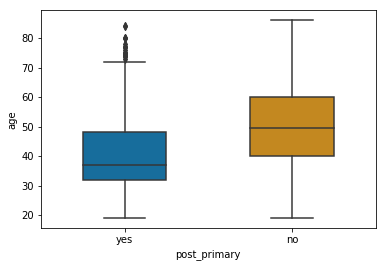

In [134]:
# Plot Age verus Post_Primary
bplot = sns.boxplot(y='age', x='post_primary', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# Some overlap but separate medians

<a id='task1_tree_app'></a>

#### Task 1 - Age Decision Tree Application

Using the newly created features "work_status", "has_been_married" and "post_primary", create a decision tree to impute the missing age values and apply it to the datafream

In [135]:
# Show new features are present
df.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,subscribed,work_status,has_been_married,post_primary
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,...,apr,957,2,131,2,failure,no,available,no,yes
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,...,apr,233,2,133,1,failure,no,available,yes,yes
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,...,apr,126,2,239,1,failure,no,retired,yes,yes
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,...,apr,274,1,238,2,failure,no,available,yes,yes
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,...,apr,479,1,307,1,failure,no,retired,yes,yes


In [136]:
# Convert new features to numerical
# Setting drop_first=True to minimize the number of numerical attributes used to encode the categorical values

df = pd.get_dummies(df, columns=['work_status',  'has_been_married', 'post_primary'], drop_first=True)

df.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,duration,campaign,pdays,previous,poutcome,subscribed,work_status_retired,work_status_student,has_been_married_yes,post_primary_yes
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,...,957,2,131,2,failure,no,0,0,0,1
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,...,233,2,133,1,failure,no,0,0,1,1
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,...,126,2,239,1,failure,no,1,0,1,1
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,...,274,1,238,2,failure,no,0,0,1,1
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,...,479,1,307,1,failure,no,1,0,1,1


In [137]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,work_status_retired,work_status_student,has_been_married_yes,post_primary_yes
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500,0.081000,0.04800,0.663000,0.839500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735,0.272903,0.21382,0.472803,0.367161
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000,0.000000,0.00000,1.000000,1.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000,0.000000,0.00000,1.000000,1.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,1.00000,1.000000,1.000000


In [138]:
# Dataset for Decision Tree
y = df[['age']].values
X = df[['work_status_retired','work_status_student', 'has_been_married_yes', 'post_primary_yes']].values

In [139]:
# Remove all NaNs from the X and Y set used for the Decision Tree

# from https://stackoverflow.com/questions/911871/detect-if-a-numpy-array-contains-at-least-one-non-numeric-value
if (np.where(np.isnan(y)))[0].shape[0]: 
    print ("y contains nan")
else:
    print ("y does not contain nan")
    
if (np.where(np.isnan(X)))[0].shape[0]: 
    print ("X contains nan")
else:
    print ("X does not contain nan")
    
# Y Contains Nan that needs to be removed
# Get index of locations that contain NaN
# and remove from both X and Y
nan_idx = np.argwhere(np.isnan(y))
nan_idx = nan_idx[:,0]

y = np.delete(y, nan_idx, 0)
X = np.delete(X, nan_idx, 0)

# Check that no NaNs remain

if (np.where(np.isnan(y)))[0].shape[0]: 
    print ("y contains nan")
else:
    print ("y does not contain nan")

y contains nan
X does not contain nan
y does not contain nan


In [140]:
print(y.shape)
print(X.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1988, 1)
(1988, 4)


In [141]:
# Train Decision Tree
from sklearn import tree

age_dt = tree.DecisionTreeRegressor()
age_dt = age_dt.fit(X_train, y_train)
print("Decision Tree Score:\t",age_dt.score(X_test, y_test))

y_hat = age_dt.predict(X_test);

# Print predictions versus actual on test dataset
#for i in range (len(y_test)):
#    print(i,"\t Test\t",y_test[i],"\tPredict\t",y_hat[i],"\tDelta\t",y_test[i]-y_hat[i])

Decision Tree Score:	 0.5557605954037013


In [142]:
# Get indices of rows with missing 'age' values
idx = df.loc[df['age'].isnull()].index
    
# Rebuild X and Y with the previously removed NaNs
y = df[['age']].values
X = df[['work_status_retired','work_status_student', 'has_been_married_yes', 'post_primary_yes']].values

for i in idx:
    # Reshapre X[i
    X_pred = np.expand_dims(X[i], axis=1)

    # Make a prediction using the Age Decision Tree Regressor and convert to INT
    pred = int(age_dt.predict(X_pred.T))

    # Replace the NaN value with the Predicted Value
    df.loc[i, 'age'] = pred

# Print contents before replacement:
for i in idx:
    print("Index",i,"updated with predicted value",df.loc[i, 'age'])


Index 456 updated with predicted value 42.0
Index 472 updated with predicted value 48.0
Index 526 updated with predicted value 42.0
Index 595 updated with predicted value 42.0
Index 597 updated with predicted value 42.0
Index 601 updated with predicted value 33.0
Index 605 updated with predicted value 42.0
Index 744 updated with predicted value 42.0
Index 795 updated with predicted value 33.0
Index 1171 updated with predicted value 65.0
Index 1232 updated with predicted value 25.0
Index 1408 updated with predicted value 33.0


<a id='task1_tree_analysis'></a>

#### Task 1 - Age Decision Tree Analysis

Calculated Missing Values:
* The student (Index 232) was given an age of 25
* The retiree (Index 1171) was given an age of 65
* The 3 working singletons (Indices 601, 795 and 1408) were given an age of 33
* The only missing example with only a primary education was given an age of 48
* The 6 other remaining indices were given an age of 42

Given that the mean age for this attribute was 42 (41.75 rounded to nearest int), it appears that 50% of the missing values were given this value when imputed.

However, the other 50% of the missing values were given values different to the overall mean by taking account of job, education and marital status.

Although using a decision tree might have been overkill in this particular case, I think it shows the general usefulness of this approach for imputing missing data

<a id='task1_job'></a>

#### Task1 -  Fill In Missing "Job" Values

In [143]:
# Print the 'age', 'education' and 'marital' values for examples with NaN for 'job'
print(df[df["job"].isnull()][['job', 'age', 'education', 'marital']])

      job   age  education  marital
255   NaN  42.0    primary   single
257   NaN  46.0        NaN  married
831   NaN  41.0    primary   single
1223  NaN  55.0  secondary  married
1281  NaN  50.0        NaN  married
1669  NaN  54.0  secondary  married
1711  NaN  77.0        NaN  married
1801  NaN  28.0        NaN   single
1868  NaN  48.0        NaN   single
1975  NaN  45.0   tertiary  married


#### Analysis on Job Missing Values
* There are 10 rows with missing job values
* Intuitively, one would think that education could be used as an indicator of the type of job
* Unfortunately, of the 10 rows with missing job values, 5 of the rows also have missing education values so it is not realistic to be able to expect the infer the missing values based on education
* One of the rows with a missing job has an age of 77. Based on previous boxplots, the job could be set to "retired" with reasonable confidence
* For the other rows, it is not possible to make a sensible categorical guess. Therefore I am going to replae "NaN" with "unknown"

In [144]:
# Replace the NaN value with the Predicted Value
df.loc[1711, 'job'] = 'retired'

# Replace the remaining NaN values with 'Unknown'
df['job'].fillna('unknown', inplace=True)

<a id='task1_edu'></a>

#### Task1 -  Fill In Missing "Education" Values

In [145]:
# Print 'job', 'age' and 'marital' for rows where education is NaN
print(df[df["education"].isnull()][['education', 'job', 'age', 'marital']])

     education            job   age   marital
10         NaN     management  38.0    single
15         NaN    blue-collar  38.0   married
124        NaN    blue-collar  39.0   married
209        NaN     management  37.0   married
257        NaN        unknown  46.0   married
262        NaN    blue-collar  31.0   married
285        NaN     technician  51.0  divorced
324        NaN    blue-collar  41.0   married
348        NaN         admin.  56.0   married
381        NaN     management  43.0   married
389        NaN     technician  33.0    single
404        NaN     technician  58.0   married
419        NaN       services  31.0    single
442        NaN    blue-collar  35.0    single
449        NaN    blue-collar  40.0   married
521        NaN     technician  46.0   married
527        NaN     technician  52.0   married
542        NaN     technician  52.0   married
547        NaN     management  54.0   married
566        NaN     technician  51.0   married
657        NaN        retired  60.

               education
job                     
admin.          0.958159
blue-collar     0.677083
entrepreneur    0.909091
housemaid       0.542857
management      0.979452
retired         0.651316
self-employed   1.000000
services        0.924051
student         0.949367
technician      0.972561
unemployed      0.926471
unknown         0.600000


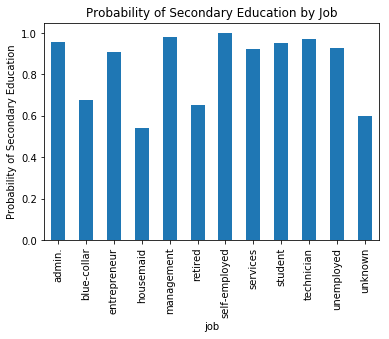

               education
job                     
admin.          0.146444
blue-collar     0.034722
entrepreneur    0.500000
housemaid       0.200000
management      0.892694
retired         0.144737
self-employed   0.758065
services        0.069620
student         0.202532
technician      0.310976
unemployed      0.294118
unknown         0.200000


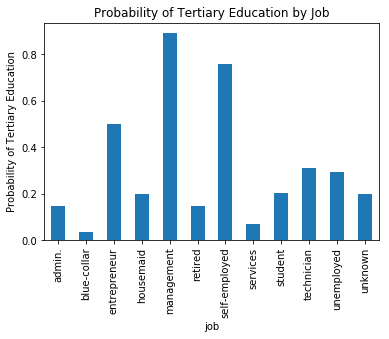

In [146]:
# Create a pivot table for second level education versus job
# Map Primary to 0
# Map Secondary and Tertiary to 1 (Combine the values as everyone in tertiary also has secondary)

pivot_table = df.pivot_table(values='education',
                       index=['job'],
                       aggfunc=lambda x: x.map({'primary':0, 'secondary':1, 'tertiary':1}).mean()) 

# Print pivot table
print(pivot_table)

# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('job')
plt.ylabel('Probability of Secondary Education')
plt.title('Probability of Secondary Education by Job')
plt.legend().set_visible(False) # we don't need the default legend

plt.show()

# Create a pivot table for tertiary level education versus job
# Map Primary  and Secondary to 0 (Combine the values as no one in these categories has tertiary)
# Map Tertiary to 1 

pivot_table = df.pivot_table(values='education',
                       index=['job'],
                       aggfunc=lambda x: x.map({'primary':0, 'secondary':0, 'tertiary':1}).mean()) 

# Print pivot table
print(pivot_table)

# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('job')
plt.ylabel('Probability of Tertiary Education')
plt.title('Probability of Tertiary Education by Job')
plt.legend().set_visible(False) # we don't need the default legend

plt.show()

#### Education Missing Values Analysis
* Total Values = 	 1896 
 -  secondary    995
 - tertiary     684
 - primary      217

* 11% Primary Education
* 52% Secondary Education
* 36% Tertiary Education

Assuming that everyone with a Tertiary Education also has a Seconday Education, this means that 88% of people actually have a secondary education

##### Using job as an indicator of education level

For all job types, the probability of secondary education (incl tertiary) is greater than 0.5, indicating that it is most likely that all of the missing samples have at least got a secondary education.

There are only three job types that have a probability of tertiary education greater than 0.5
* entrepeneur = 0.5
* management = 0.89
* self-employed = 0.75

All the other job types have a low probability of having tertiary education.

Therefore, the strategy to replace NaNs in Education column will be as follows:
* Replace all Education NaNs that have a job = 'entrepeneur' OR 'management' OR 'self-employed' with 'tertiary'
* Replace all others with 'secondary'

In [147]:
# Get indices of rows with missing 'education' values and job = ['management','entrepeneur','self-employed']
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas/17071908
idx = df.loc[(df['job'].isin(['management','entrepeneur','self-employed'])) & (df['education'].isnull())].index

# Replace all Education NaNs that have a job = 'entrepeneur' OR 'management' OR 'self-employed' with 'tertiary'
for i in idx:
    # Replace the NaN value with the Predicted Value
    df.loc[i, 'education'] = 'tertiary'

# Fill the rest of the missing values with 'secondary'
df['education'].fillna('secondary', inplace=True)


<a id='task1_con'></a>

#### Task1 -  Fill In Missing "Contact" Values

Total Values = 	 1809 

cellular     1663
telephone     146

92% of values are 'cellular'.  Reasonably safe to assume that 90+% of missing values are also cellular

Replace all missing values with 'cellular'

In [148]:
# Fill missing 'contact' values with 'cellular'
df['contact'].fillna('cellular', inplace=True)

<a id='task1_poutcome'></a>

#### Task1 -  Fill In Missing "Poutcome" Values

Total Values = 	 1546 

failure    955
success    444
other      147

62% Failure
29% Success
9.5% Other

There are almost 25% of the dataset with a missing value for this attribute. Given that this attribute already has an "other" label that has no specific outcome attached to it, I am going to replace all missing values with "other"

In [149]:
# Fill missing 'poutcome' values with 'other'
df['poutcome'].fillna('other', inplace=True)

In [150]:
# Check that all attributes no longer have any missing values
df.apply(lambda x: sum(x.isnull()), axis=0)

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
ratio_bal_ln            0
ratio_ln_inc            0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
subscribed              0
work_status_retired     0
work_status_student     0
has_been_married_yes    0
post_primary_yes        0
dtype: int64

<a id='task1_analysis'></a>

#### Task1 -  Analysis

##### Task 1 Missing Values

    * age              12 Missing Values
    * job              10 Missing Values
    * education       104 Missing Values
    * contact         191 Missing Values
    * poutcome        454 Missing Values

##### Age
Age has 12 missing features. I thought that 'job' might be a good indicator of age and plotted a boxplot of age versus job. It showed that 'student' had lower ages than most other 'job' values and that 'retired' had higher values than all other jobs - this outcome stands to reason. For all the other jobs, the spread of ages on the boxplot looked broadly similar (except possibly for entrepeneur and handmain) and suggested most other jobs had a reasonable age distribution.

I also plotted 'education' versus 'age' and it showed that 'primary' had a slightly higher average age than 'secondary' and 'tertiary'. 

Similarly, 'marital' status versus 'age' showed that 'single' had a lower range than 'married' and 'divorced' again this stands to reason.

I decided to use a decision tree using job, education and marital to infer age. 

As jobs had ages clustered in three ranges, I created a new feature "work_status" that bucketed applicants into "available" for work, "retired" or "student".

Since married also had clustered ages, I created a new feature 'has_been_married' which grouped 'married' and 'divorced' together and kept 'single' as its own label

As secondary and tertiary education had similar age spreads, I created a feature called "post_primary" to group these together.

I used these engineered feature to create a decision tree to infer the value of ages

##### Job
One of the rows with a missing job has an age of 77. Based on previous boxplots, the job could be set to "retired" with reasonable confidence
For the other rows, it is not possible to make a sensible categorical guess. Therefore I am going to replae "NaN" with "unknown"

##### Education
I used pivot table analysis to infer the missing values by determining the probability of the level of education by the current  job. 


##### Contact
For 'contact', as 90+% of non-missing data used 'cellular', I used this value to replace the missing values

##### Poutcome
For 'poutcome' there was already an 'other' category which I reused for the missing values

[click this link](#contents) to jump back to the table contents at the beginning of the notebook.

<a id='task2'></a>

# Task 2 

Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

#### Function to Plot Histograms and Boxplot

The following function is used to jointly plot a histogram and a boxplot using seaborn

This function will be used to examine the numerical attributes for outliers

In [151]:
def plot_hist_with_box(feature):
    # From https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(df[feature], ax=ax_box)
    sns.distplot(df[feature], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()
    return

<a id='task2_plot'></a>

#### Task2 -  Numerical Attribute Plots

Iterate through the numerical attributes, plotting a box plot and histrogram for each attribute

The box plot will be used to look for outliers
The histogram will be used to examine the distribution

Feature:	 age


C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


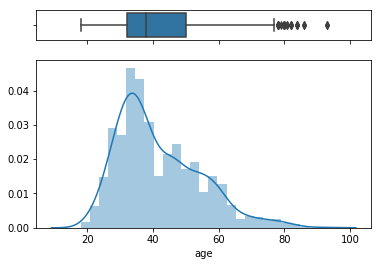


 ----------------------------------------------------------------------
Feature:	 balance


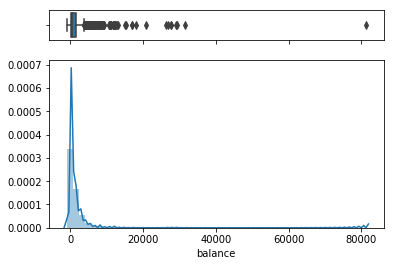


 ----------------------------------------------------------------------
Feature:	 ratio_bal_ln


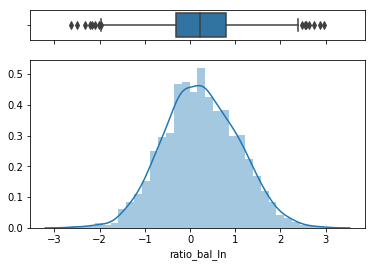


 ----------------------------------------------------------------------
Feature:	 ratio_ln_inc


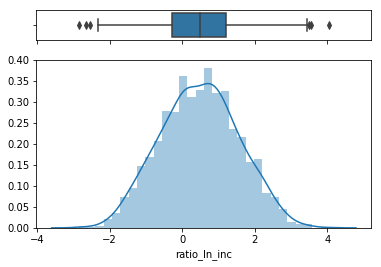


 ----------------------------------------------------------------------
Feature:	 day


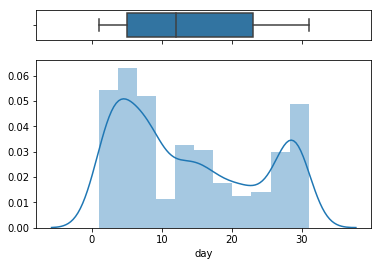


 ----------------------------------------------------------------------
Feature:	 duration


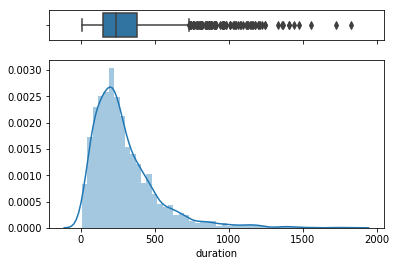


 ----------------------------------------------------------------------
Feature:	 campaign


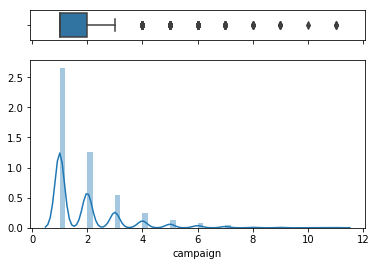


 ----------------------------------------------------------------------
Feature:	 pdays


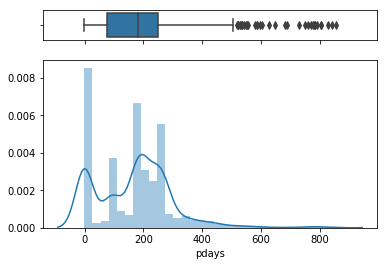


 ----------------------------------------------------------------------
Feature:	 previous


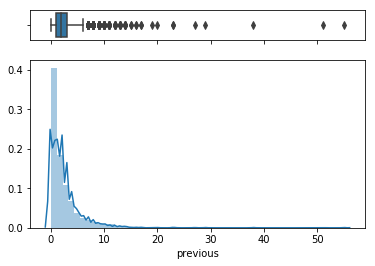


 ----------------------------------------------------------------------


In [152]:
# For each numerical attribute, plot a boxplot and histogram
for col in numeric_cols:
    print('Feature:\t',col)
    plot_hist_with_box(str(col))
    print('\n', '-' * 70) # separator to make the output easy to read


<a id='task2_plot_analysis'></a>

#### Task2 -  Numerical Attribute Plots Analysis
	• age 
		○ Applicant Age
		○ 18-93
		○ Several outliers in the late70s to early 90s
	• balance
		○ Average Yearly Balance
		○ One very far out outlier
		○ Many other outliers
		○ Not normally distributed
		○ Has negative values so log transform cannot be applied directly
	• ratio_bal_ln
		○ Ratio of Balance to Loan
		○ Normally distributed
		○ Some outliers in tail regions
		○ Centred around zero
	• ratio_ln_inc
		○ Ratio of Loan to Income
		○ Normally distributed
		○ Some outliers in tail regions
		○ Centred around zero
	• day
		○ Last contact day of month
		○ Distribution aligns with a number that is used to indicate a calendar dat
		○ Bump at beginning and end of month indicates those are the busiest periods of the month
	• duration
		○ Last contact duration in seconds
		○ Normal distribution with outliers in tail region
	• campaign
		○ Number of Contacts Performed during the current campaign
		○ Majority of people contacted 1-3 times
	• pdays
		○ Number of days that passed by after the client was last contacted from a previous campaign
		○ -1 = Not contacted
		○ There are 454 examples with pdays set to -1 to indicate no contact, this is distrorting the distribution
		○ If this value was ignored, the distribution would start to approach a normal distribution
		○ There are no examples with a value of pdays = 0
		
	• previous
		○ Number of Contacts Performed during the previous campaign
		○ Varies from 0 to 55 but with an average of 2.5
		○ The 75% value is 3 which suggests a lot of outliers
        ○ TheExponential distribution appearance

#### Next Steps
* Transform Age to handle outliers
* Transform Balance to see if better distribution possible and to handle outliers
* Outliers not being considered for removal/transformation as they will not be used in subsequent logistic regression (and due to time pressue):
  - duration
  - pdays
  - previous

<a id='task2_age_boxcox'></a>

#### Task2 -  "Age" Box-Cox Transformation

* Apply a log transform via the Box-Coc transformation to age
* One outlier still remaining
* Distribution is more normal and centred around zero

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


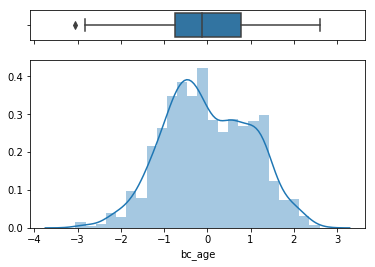

In [153]:
# Apply Box-Cox Transform to 'age'

df['bc_age'] = power_transform(np.expand_dims(df['age'], axis=1), method='box-cox')
plot_hist_with_box('bc_age')

<a id='task2_bal_yj'></a>

#### Task2 -  "Balance" Yeo-Johnson Transformation
* Balance has negative values so a log transform cannot be applied directly
* The Yeo-Johnson transformation handles negative and positive values so will be used here
* After transformation, there are still significant outliers but the data has a more centred and normal distribution
* The extreme values are valid but the log-like transformation should help to reduce the negative impact

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


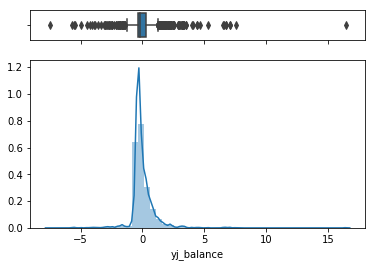

In [154]:
# Balance contains negative values which means log transform or box-cox cannot be applied
# Yeo-Johnson handles positive and negative numbers so applying that transform

df['yj_balance'] = power_transform(np.expand_dims(df['balance'], axis=1), method='yeo-johnson')
plot_hist_with_box('yj_balance')

<a id='task2_analysis'></a>

#### Task2 -  Analysis

##### Age
* Several outliers in the late70s to early 90s but these are valid values
* Distribution is a bit normal but with long tail to high values.
* Left tail cuts off at 18
* Applied a log transform via the Box-Coc transformation to age to improve distribution and reduce negative impact of outliers
* One outlier still remaining
* Distribution is more normal and centred around zero

##### Balance
* Many outliers with one very far out outlier. Assuming values are valid
* Not normally distributed
* Has negative values so log transform cannot be applied directly
* The Yeo-Johnson transformation handles negative and positive values so will be used here
* After transformation, there are still significant outliers but the data has a more centred and normal distribution
* The extreme values are valid but the log-like transformation should help to reduce the negative impact

##### Campaign, Pdays and Previous
* I had to drop this work due to time pressure and due to not seeing positive results
* Campgain is the number of contacts in this campaign
* Pdays is the number of days since the last contact in previous campagin
* Pdays used "-1" to indicate no contact and this introduces a heavy skew in the data
* My initial thoughts were that I could handle the outliers in these 3 attributes and the "-1" skew by 
  combining all 3 attributes into a "combined_contact" attribute
* The intention was to start with the 'campaign' values and add the 'previous' values but uses the number of days in 'pdays' 
  to downscale the value in 'previous'
* For example, if there were 10 previous contacts and the last contact was only 30 days ago then this contact would be reasonably 'fresh' and would add to the contacts in the current campaing
* Similarly, if there were 20 contacts but the last contact was over 2 years, then this contact would be 'stale' and only add
  minimally to the contacts in the current campaign
* I tried a few methods (e.g. an exponential decay) but nothing was showing dividends and I abandoned due to time constraints

[click this link](#contents) to jump back to the table contents at the beginning of the notebook.

<a id='task3'></a>

## Task 3 (CS5062)
Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

I created three new features that I used for imputing the missing values of 'age'. The code for these features is in the Task 1 section. I have added links between Task 1 and Task 3 sections so it is easy to jump between the code in those two sections

<a id='task3_work_status'></a>

#### Task 3 - "Work Status" Feature

Box plot analysis of "job" showed that there were 3 distinct clusters in terms of "age" : "retired", "single" and all 
other jobs. To capture this I created a new feature called "work_status" that has 3 values : "student", "retired" and
"available"

[click this link](#task3_work_status_code) to jump the code relating to this feature in the Task 1 section of the Notebook.

<a id='task3_has_been_married'></a>

#### Task 3 - "Has Been Married" Feature

Box plot analysis of "martial" showed that "married" and "divorced" had similar age distribution and were distinct to
"single". As a result I created a new feature called "has_been_married" that combined "married" and "divorced" for the
purpose of imputing "age"

[click this link](#task3_has_been_married_code) to jump the code relating to this feature in the Task 1 section of the Notebook.

<a id='task3_post_primary'></a>

#### Task 3 - "Post Primary" Feature

Box plot analysis of "education" showed "primary" had a higher median age than "secondary" and "tertiary".
It also showed that "secondary" and "tertiary" had similar medians. I created a new feature called "post_primary"
to capture this. It combines "secondary" and "tertiary" as everyone in those categories has at least secondary education

[click this link](#task3_post_primary_code) to jump the code relating to this feature in the Task 1 section of the Notebook.

<a id='task3_analysis'></a>

#### Task 3 - Analysis

##### New Features Created

The features I created - work_status, has_been_married and post_primary - were used for building a decision tree to impute the missing values of 'age'. As such these features were chosen for the insight they provided into 'age' more than the insight they provided into the target variable 'subscribed'.

This is acknowledged as not being exactly as per the task but I did find it very useful to combine the feature created and the handling missing values in this manner.

Will these features benefit the classification task? My intuition is that they wont as they might hide information that is valuable for determining 'subsribed' but not valuable for determining 'age'. For example, 'work_status' might hide specific jobs that are more or less likely to inform the likelihood to subcribe.

##### New Features Not Created Due to Time Pressure

I would have liked to conduct a PCA-like reduction on the 'jobs' category to see what jobs were most influencing the value of 'subscribed'. I have seen some online arguments about the value of using PCA on categorical attributes that have been converted to one-hot but I would have liked to see the impact myself. There are recent papers such as [this](https://arxiv.org/pdf/0711.4452.pdf) that suggest there is merit.

It would also have been worthwhile to do some trivial things like convert 'months' into 'seasons'

<a id='task4'></a>

## Task 4 (CE6002)
Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

<a id='task4_replace_cat'></a>

#### Task 4 - Replace Categoricals With Numerical Attributes

One hot encode all categoricals so that they are available for use in Logistic Regression if required

In [156]:
df = pd.get_dummies(df, columns=['job','marital', 'education', 'housing', 'default', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [157]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,work_status_retired,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,41.747000,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500,0.081000,...,0.122500,0.083500,0.052000,0.035000,0.166500,0.034000,0.046500,0.067000,0.30050,0.222000
std,12.707586,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735,0.272903,...,0.327944,0.276706,0.222083,0.183826,0.372622,0.181274,0.210618,0.250085,0.45859,0.415695
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [158]:
df.head()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,subscribed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,32.0,392,1.300134,0.473895,1,957,2,131,2,no,...,0,0,0,0,0,0,0,0,0,0
1,39.0,688,-0.193701,0.237021,1,233,2,133,1,no,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1035,1.334266,0.121981,1,126,2,239,1,no,...,0,0,0,0,0,0,0,0,0,0
3,47.0,398,0.362286,1.251328,1,274,1,238,2,no,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1004,0.072075,-0.533738,1,479,1,307,1,no,...,0,0,0,0,0,0,0,0,0,0


In [159]:
df.tail()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,subscribed,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
1995,20.0,2785,-2.170524,1.081071,16,327,2,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1996,28.0,127,0.811788,1.134496,16,1334,2,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1997,81.0,1154,0.504655,0.042190,17,231,1,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1998,46.0,4343,-0.965874,0.302708,20,185,1,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0
1999,40.0,6403,-0.800893,1.066659,22,208,2,-1,0,yes,...,0,0,0,0,0,0,0,1,1,0


<a id='task4_prep_dataset'></a>

#### Task 4 - Prepare Dataset

In [160]:
# Get list of numeric columns in datset
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
colnames_numerics_only = df.select_dtypes(include=[np.number]).columns.tolist()
print(colnames_numerics_only)
print(len(colnames_numerics_only))


['age', 'balance', 'ratio_bal_ln', 'ratio_ln_inc', 'day', 'duration', 'campaign', 'pdays', 'previous', 'work_status_retired', 'work_status_student', 'has_been_married_yes', 'post_primary_yes', 'bc_age', 'yj_balance', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_yes', 'default_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success']
47


#### Dataset Feature Selection

I tried various combinations and achieved different results. For the purpose of this Etivity, I decided that overall performance was not the key metric and that it was more important to be able to see the impact of feature selection on the VC dimension, the VC bound and the Hoeffding bound.

With this in mind, I selected the same features as Etivity1 and also added the features that were either created or
transformed in previous tasks.

For the sake of comparison, I also generate probability plots when using the same dataset as Etivity1 with just two input features and show the impact on the VC bound

In [170]:
#Shuffle the dataframe
df = df.sample(frac=1, random_state=42)

# Create the dataset from the dataframe
#X = df[colnames_numerics_only].values
#X = df[['ratio_bal_ln', 'ratio_ln_inc']].values
#X = df[['ratio_bal_ln', 'ratio_ln_inc','bc_age', 'yj_balance','has_been_married_yes', 'post_primary_yes','job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']].values
X = df[['ratio_bal_ln', 'ratio_ln_inc','bc_age', 'yj_balance','has_been_married_yes', 'post_primary_yes','work_status_retired', 'work_status_student']].values
#X = df[['ratio_bal_ln', 'ratio_ln_inc','bc_age', 'yj_balance']].values
y_labels = df[['subscribed']].values

# Using output values of 0 and 1 for Logistic Regression
y = [1 if yy == 'yes' else 0 for yy in y_labels] 

In [171]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='task4_logreg'></a>

#### Task 4 - Logistic Regression Classification

In [172]:
# Example Code taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# Run Logistic Regression on the dataset to compare with performance achieved using Pocket algorithm
#logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs')

# Fit to dataset
logreg.fit(X_train, y_train)

# Predict
y_hat = logreg.predict(X_test)

score_test = logreg.score(X_test, y_test)
score_train  = logreg.score(X_train, y_train)

# Substract scores from 1 to convert to Ein/Eout
etrain = 1 - score_train
etest = 1 - score_test

print("Logistic Regression Performance")
print("Etrain  =\t",etrain)
print("Etest = \t",etest)

Logistic Regression Performance
Etrain  =	 0.17437499999999995
Etest = 	 0.21250000000000002


<a id='task4_prob'></a>

#### Task 4 - Probability Plots
* Using same approach as given in Etivity1 solutions

Approximating the probability that |E_in - E_out|>epsilon by running the experiment multiple times and recording error scores. Done here for 100 iterations to limit processing time. For higher number of iterations, likelihood of non-zero values for higher epsilons increases.

In [219]:
def probability_plot(X,y):
    repeats=1000
    #use 20% of data for training
    tr_size = 0.8
    error_in=[]
    error_out=[]
    for i in range(repeats):
        # MPP print(i) <-- Do not print i
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=tr_size, test_size=(1-tr_size))

        # Example Code taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

        # Run Logistic Regression on the dataset to compare with performance achieved using Pocket algorithm
        # Add "solver='lbfgs'" to remove "FutureWarning: Default solver will be changed
        # to 'lbfgs' in 0.22. Specify a solver to silence this warning."
        logreg = LogisticRegression(solver='lbfgs')

        # Fit to dataset
        logreg.fit(X_train, y_train)

        score_test = logreg.score(X_test, y_test)
        score_train  = logreg.score(X_train, y_train)

        # Substract scores from 1 to convert to Ein/Eout
        etrain = 1 - score_train
        etest = 1 - score_test

        error_in.append(etrain)
        error_out.append(etest)

    # N is equal to the number of samples in the training set
    N=len(X_train)

    # VC dimension (dvc) = d+1 where d is the dimensionality of the input data
    # Use the shape of X_train to determine the dimensionality of the input features
    # Add 1 to this value to create dvc
    dvc = X_train.shape[1] + 1

    dvc_text = "dVC = "+str(dvc)

    error_diff = abs(np.array(error_in)-np.array(error_out))
    epsilons = np.arange(0.001,0.20,0.001)
    prob_epsilon=[]
    for e in epsilons:
            prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
    plt.plot(epsilons, prob_epsilon, 'b')

    hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
    vc = [4*(((2*N)**dvc)+1)*math.exp(-(N/8)*e**2) for e in epsilons]

    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
    print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")

    title = "Probability |Ein-Eout| is greater than Epsilon"
    plt.plot(epsilons, hoef,'r')
    plt.plot(epsilons, vc, 'g')
    plt.yscale('log')
    plt.xlabel('Epsilon')
    plt.title(title)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
    plt.text(x = 0.15, y = 10**-26, s = 'Hoeffding Bound', color = 'r', weight = 'bold', rotation = 0, backgroundcolor = '#ffffff')
    plt.text(x = 0.15, y = 10*7, s = 'VC Bound', color = 'g', weight = 'bold', rotation = 0, backgroundcolor = '#ffffff')
    plt.text(x = 0.05, y = 10*7, s = 'P[Ein-Eout|>e]', color = 'b', weight = 'bold', rotation = 0, backgroundcolor = '#ffffff')
    plt.text(x = 0.1, y = 10**-44, s = dvc_text, color = 'k', weight = 'bold', rotation = 0, backgroundcolor = '#ffffff')
    plt.show()

    return


Error exceeds Hoeffding
Error does not exceed VC


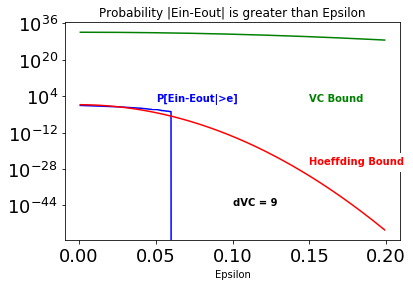

In [220]:
probability_plot(X,y)

Error exceeds Hoeffding
Error does not exceed VC


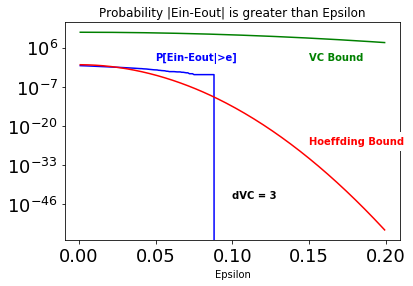

In [221]:
# Re-run plot on simple dataset using the same two features from Etivity 1
X_simple = df[['ratio_bal_ln', 'ratio_ln_inc']].values

probability_plot(X_simple,y)

<a id='task4_analysis'></a>

#### Task4 -  Analysis

The Hoeffding Bound was exceeded.

The VC Bound was not exceeded.

##### Hoeffding Bound Analysis
Based on the Week 4 Q&A, the takeway is that machine learners can exceed the Hoeffding bound. The likelihood of generating an example that exceeds the bound increases as the number of iterations run increases.

The plots were generated for a dataset with dVC=9 and dVC=3 and in both cases the Hoeffding bound was exceeded. However, the bound was the same in both cases which is not true for the VC bound.

##### VC Bound Analysis
The VC Bound is a much looser bound than the Hoeffding bound so it is not a surprise to see that it has not been exceeded.

The plots were generated for a dataset with dVC=9 and dVC=3 and in both cases the VC bound was not exceeded. However, the C bound has moved much further away from the Hoeffding bound for the case where dVC=9 due to the impact that increasing the VC dimension has on the bound.

[click this link](#contents) to jump back to the table contents at the beginning of the notebook.

<a id='task5'></a>

# Task 5 (CE6002)
Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.


[click this link](#contents) to jump back to the table contents at the beginning of the notebook.

In [183]:
def plot_learning_curve(X,y,estimator=LogisticRegression(solver='lbfgs')):
# https://www.dataquest.io/blog/learning-curves-machine-learning/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

    # Max Value = 80% of 2000 = 1600
    # train_sizes = [1, 100, 500, 1000, 1600] ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
    #train_sizes = [10, 100, 500, 1000, 1600]
    train_sizes = [25, 50, 75, 100, 125, 250, 500, 1000, 1600]

    train_sizes, train_scores, validation_scores = learning_curve(
                                                       estimator = estimator, X = X,
                                                       y = y, train_sizes = train_sizes, cv = 5)

    # from https://www.w3resource.com/python-exercises/re/python-re-exercise-50.php
    # Remove any text between the parentheses in the title string
    estimator_string = re.sub(r" ?\([^)]+\)", "", str(estimator))
    
    
    print('\n', '-' * 70) # separator to make the output easy to read
    print('Estimator = ',estimator_string)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)
    print('\n', '-' * 70) # separator to make the output easy to read

    #train_scores_mean = -train_scores.mean(axis = 1)
    #validation_scores_mean = -validation_scores.mean(axis = 1)
    # MPP Remove the "-" from reference code in article
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    train_scores_std = train_scores.std(axis = 1)
    validation_scores_std = validation_scores.std(axis = 1)

    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    print('\n', '-' * 70) # separator to make the output easy to read
          
    title = 'Learning curves for a '+estimator_string+' model'
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
   # plt.title(title, fontsize = 18, y = 1.03)
    plt.title(title, fontsize = 18)
    plt.legend()
    plt.show();


<a id='task5_logistic'></a>

#### Task 5 - Logisic Regression Learning Curve


 ----------------------------------------------------------------------
Estimator =  LogisticRegression

 ----------------------------------------------------------------------
Training scores:

 [[0.96       0.88       0.88       0.88       0.88      ]
 [0.9        0.84       0.84       0.84       0.84      ]
 [0.85333333 0.85333333 0.85333333 0.85333333 0.85333333]
 [0.87       0.85       0.85       0.85       0.85      ]
 [0.864      0.84       0.84       0.84       0.84      ]
 [0.864      0.812      0.812      0.812      0.812     ]
 [0.844      0.824      0.838      0.838      0.838     ]
 [0.836      0.827      0.831      0.836      0.836     ]
 [0.814375   0.809375   0.815      0.825625   0.8275    ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.69   0.7775 0.7575 0.76   0.72  ]
 [0.755  0.82   0.795  0.7775 0.7675]
 [0.79   0.8275 0.8025 0.7875 0.77  ]
 [0.78   0.83   0.8025 0.7825 0.7575]
 [0.795  0.84   0.8125 0.79   0.7

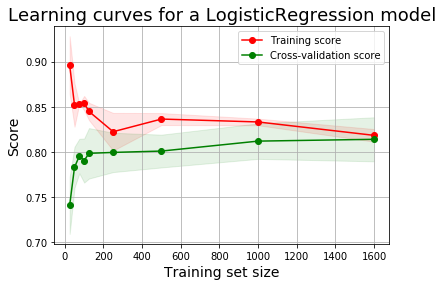

In [184]:
 plot_learning_curve(X,y,estimator=LogisticRegression(solver='lbfgs'))

<a id='task5_linear'></a>

#### Task 5 - Low Complexity Learning Curve : Linear Regression


 ----------------------------------------------------------------------
Estimator =  LinearRegression

 ----------------------------------------------------------------------
Training scores:

 [[0.55388464 0.59657908 0.59657908 0.59657908 0.59657908]
 [0.56032051 0.52850402 0.52850402 0.52850402 0.52850402]
 [0.54639934 0.56751322 0.56751322 0.56751322 0.56751322]
 [0.56910545 0.53061046 0.53061046 0.53061046 0.53061046]
 [0.57417033 0.4700838  0.4700838  0.4700838  0.4700838 ]
 [0.5475856  0.41531055 0.41531055 0.41531055 0.41531055]
 [0.48437297 0.43896801 0.46445804 0.46445804 0.46445804]
 [0.47483104 0.44552367 0.468777   0.45116    0.45116   ]
 [0.43596597 0.41699178 0.4301938  0.42515196 0.45383926]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.22205145 0.2018842  0.14369454 0.10747507 0.05103996]
 [0.33088803 0.39793193 0.31997019 0.2936631  0.16650126]
 [0.37651674 0.42335152 0.35535387 0.34546493 0.21035171]
 [0.37251234 

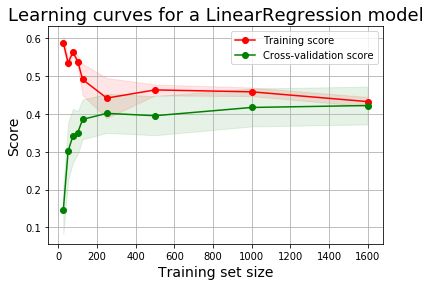

In [177]:
plot_learning_curve(X,y,estimator=LinearRegression())

<a id='task5_adaboost'></a>

#### Task 5 - High Complexity Learning Curve : AdaBoost


 ----------------------------------------------------------------------
Estimator =  AdaBoostClassifier

 ----------------------------------------------------------------------
Training scores:

 [[1.       1.       1.       1.       1.      ]
 [1.       1.       1.       1.       1.      ]
 [1.       1.       1.       1.       1.      ]
 [1.       1.       1.       1.       1.      ]
 [1.       1.       1.       1.       1.      ]
 [0.96     0.892    0.892    0.892    0.892   ]
 [0.884    0.868    0.888    0.888    0.888   ]
 [0.873    0.858    0.86     0.865    0.865   ]
 [0.8475   0.8375   0.84375  0.841875 0.85    ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.655  0.6875 0.6575 0.63   0.6125]
 [0.6975 0.685  0.7025 0.6825 0.6725]
 [0.7525 0.7975 0.765  0.75   0.74  ]
 [0.7225 0.81   0.8125 0.7875 0.7325]
 [0.705  0.785  0.7175 0.7    0.695 ]
 [0.7875 0.82   0.785  0.7775 0.73  ]
 [0.7875 0.7975 0.83   0.8    0.7625]
 [0.8    

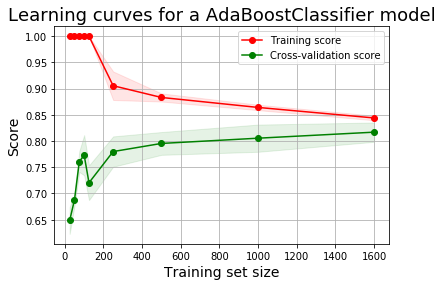

In [178]:
# From https://chrisalbon.com/machine_learning/trees_and_forests/adaboost_classifier/
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost-decision tree classifer object
#clf = AdaBoostClassifier(n_estimators=50, learning_rate=1,random_state=0)

plot_learning_curve(X,y,estimator=AdaBoostClassifier(n_estimators=50, learning_rate=1,random_state=0))

<a id='task5_analysis'></a>

#### Task 5 - Analysis

In the first instance, simply re-using the code from the [Learning Curves for Machine Learning](https://www.dataquest.io/blog/learning-curves-machine-learning/) article threw some errors as the article was performing a regressino task and the Etivity is performing a classification task. Setting N=1 means that only a single class is represented and this fires an error and the algorithm needs both classes to be represented in the training set. In fact, even for small values of N that are greater than 1, this error can fire as the randomly sampled training set may not have examples from both possible classificaitons.


Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

##### Logistic Regression Learning Curve

With just 25 samples, the training score is 90%. This is lower than Adaboost but much higher than Linear regression at this point. The training curve is not as smooth as some examples in the literature but as the numer of samples exceeds 500, it begins to reach a training performance of about 83%, reaching 82% after 1600 samples.

On the validation side, the performance starts at ~74%, reaching 80% after 500 samples and 81% after 1000 samples. After 1600 samples, the performance is still 81%.

The gap between the two scores is low which suggests low variance. In face, it appears that the performance has almost converged and it appears that the algorithm would not benefit from adding more samples at this point.

The final validation performance is similar to AdaBoost after 1600 samples which suggest similar bias and lower bias than the linear regression algorithm but it is hard to be definitive and say there is low bias as we do not know what a reasonable goal for the achievable performance is. If it is 99% then 82% validation score is not low bias.

##### Low Complexity Algorithm - Linear Regression Learning Curve

This curve behaves similar to the Linear Regression Curve in the article. Initially the training score is high but drops down to ~43% while the validation score starts low and reaches about 42%. The algorithm hits this value at around 1000 samples and does not improve much once it reaches 1600 samples. This suggests that adding more samples will not improve the performance.

The algorithm cannot capture the complexity of the data which suggest a high bias problem. This gap between the scores is low which suggest low variance.

For this algorithm we can say there is high bias, low variance and that it is underfitting the training data. Adding more training samples will not help improve performance.

Also the fact that the very first training score with just 25 samples was only 58% suggests this algorithm is struggling to capture the complexity of even a small amount of the data.

##### High Complexity Algorithm - AdaBoost Learning Curve

The training curvce does not drop below 1.0 until the number of amples reaches 250. This indicates that initially the algorithm is overfitting, almost memorising, the training data and suffering from high variance.

After about 500 samples, the validation score reaches 80% and continues to slowly increase as the number of samples increases. At the final training sample valu of 1600, the performance gap is less than 3%. This suggests the variance has now dropped.

This bias is lower than the linear regression algorithm but it is hard to be definitive and say there is low bias as we do not know what a reasonable goal for the achievable performance is. If it is 99% then 82% validation score is not low bias.

The curve would also suggest that adding more training samples could further improve performance.

##### Performance Aspects Considering the Theory of Generalisation

The approximation-generalisation tradeoff states that having a more complex hypopthesis set gives a better change of approximating f but that using a less complex hypothesis set has a better change of generalizing out of sample.

With this in mind, the more complex hypothesis set allowed by Logistic Regression and AdaBoost allow those algorithms to approximate the 'subscribed' function much better than the Linear Regresison algorithm can. As Linear Regression cannot approximate the function well enough, it has no change of generalising well (unless general bad performance is considered generalising)

Both Logistic Regression and AdaBoost start with training scores well above 80%. However, while the Logistic Regression validation score reaches ~80% after just 125 samples, AdaBoost does not reach 80% until the training set has reached 500 samples. This illustrates how a less complex hypothesis set can generalise better as Logistic Regression is less complex than AdaBoost and is providing similar performance.

A positive, however, for AdaBoost is that the training performance and validation performance have not converged yet and there could still be a 1-2% performance relative to Logistic Regression if more samples were added to the dataset.



[click this link](#contents) to jump back to the table contents at the beginning of the notebook.